# Annotation

(You can skip this step if you already have annotated patches and/or have a pre-trained `MapReader` model.)

`MapReader` provides a flexible way to set-up a new annotation task, summarized in the following three steps:

1. Edit `./annotation_tasks.yaml` file. There are two sections in this file: `tasks` and `paths`. In the `tasks` section, you need to specify a task and its labels. For example:

```yaml
# ---------------------------------------
# Define an annotation task
# This includes:
# 1. a name (e.g., building_simple or rail_space, see below)
# 2. a list of labels to be used for this task
# ---------------------------------------
tasks:
  building_simple:
    labels: ["No", "building"]
  rail_space:
    labels: ["No", "rail space"]
```

Here, the name of a task is `building_simple` with two labels, and the other one is `rail_space` also with two labels. These are just examples. You can have as many tasks or labels (e.g., for multiclass classification) as you want!

In the `paths` section:

```yaml
# ---------------------------------------
# paths
# You need to specify:
# 1. a name (e.g., task_test_one_inch_maps_001, see below)
# 2. patch_paths: path to all the patches to be annotated
# 3. parent_paths: path to the original/parent maps/images (which were patchified)
# 4. annot_dir: directory in which the outputs will be stored
# ---------------------------------------
paths:
  task_test_one_inch_maps_001:
    patch_paths: "./maps_tutorial/slice_50_50/patch-*PNG"
    parent_paths: "./maps_tutorial/*png"
    annot_dir: "./annotations_one_inch"
```

We give a name to the annotation set: `task_test_one_inch_maps_001`; slices/patches to be annotated are stored in `patch_paths` (note the wildcard `*`); the main/parent image files are stored in `parent_paths`; and we want to store the results of annotations in `annot_dir`.

2. In the `Inputs` cell (below), enter a `userID` (e.g., your name), pick a `task` and `annotation_set` specified in the yaml file in step 1.

3. Do not forget to save the annotations. You can save the annotations at any time, and next time, you will continue from where you left off.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from mapreader.annotate.utils import prepare_annotation, save_annotation

## Inputs

<Figure size 640x480 with 0 Axes>

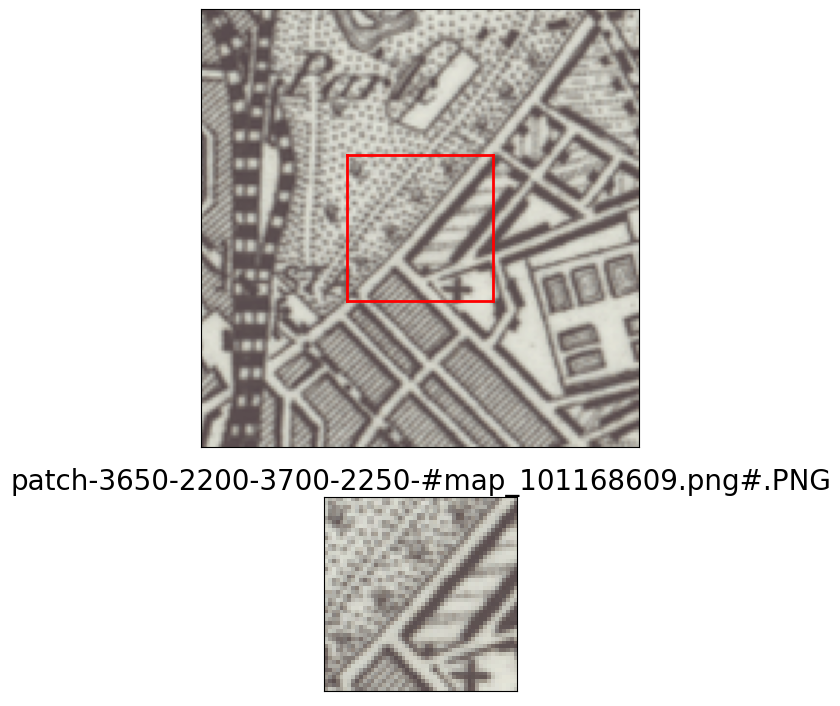

--------------------
Additional info:
Counter: 0

URL: https://maps.nls.uk/view//101168609


In [9]:
userID = "kasra"
# yaml file, list of tasks/paths
annotation_tasks_file = "./annotation_tasks.yaml"
# Pick one of the tasks in the yaml file
task = "rail_space"
# This is the name given to the annotation set in the yaml file
annotation_set = "task_test_one_inch_maps_001"

# sortby="mean" sorts the patches according to the mean pixel intensities
# xoffset and yoffset specify the border size around a patch to be used as the context image (in pixel)
annotation = prepare_annotation(userID, 
                                task, 
                                annotation_tasks_file=annotation_tasks_file,
                                annotation_set=annotation_set,
                                sortby="mean",
                                # only show patches with alpha >= min_alpha_channel
                                min_alpha_channel=0.1,
                                xoffset=50,
                                yoffset=50,
                                context_image=True)

## Start annotating

**WARNING:** in some of our experiments, when we used the keyboard shortcuts (e.g., 1, 2 or j and k, see below), two images were annotated in a row while only one patch should have been annotated. In such cases, the issue was resolved by stopping and restarting the kernel.

In [10]:
annotation

Annotation(canvas=OutputCanvas(), progress=Progress(atoms=[<ipyannotate.progress.Atom object at 0x15af807f0>, …

# Save annotations

In [11]:
save_annotation(annotation, 
                userID, 
                task, 
                annotation_tasks_file=annotation_tasks_file,
                annotation_set=annotation_set)

[INFO] Save 0 new annotations to ./annotations_one_inch/rail_space_#kasra#.csv
[INFO] 0 labels were not already stored
[INFO] Total number of annotations: 281
